## 시계열 데이터 특성

### 1. 시계열 데이터 특성
    1) Trends
    - LongTerm에서 꾸준히 상/하향는 경향성
    2) Seasonality
    - 비교적 ShortTerm으로 상/하향이 반복되는 트렌드.
    3) Cyclical
    - LongTerm에서 일정하지 않은 기간의 트렌드
    4) Noise
    - 위 3가지 경우에 해당하지 않는 경우


### 2. ETS(Error Trend Seasonality) 모델
    - 트렌드와 시즈널리티를 발견한다면 데이터 분석,테스트, 모델링 가능
    - 데이터의 패턴 파악 및 예측을 수행하기 위해 Smoothing 작업
    - Smoothing을 위해서 Error,Trend, Seasonality 요소들을 활용하는데, 각각을 더하거나 곱하여 Smoothing 함.
        또한 이것을 가지고 시계열 데이터를 모델링 할 수 있음.
    - ETS Decomposition : ETS 컴포넌트들을 시각화 하는 것은 데이터의 흐름을 이해하는데 도움이 됨

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# conda install statsmodels 미리 설치 필요
# 시계열에서 ETS 모델링 하려면 필요한 라이브러리
from statsmodels.tsa.seasonal import seasonal_decompose 

### Additive Model
Y_t = Cyclical+ Trend +Seasonality+Noise(=Error)

Cyclical데이터는 decomposition을 할 수 없어서 노이즈로 들어감

Y_t = Trend +Seasonality+Noise(=Error+ Cyclical)

나중에 노이즈에서 Cyclical 데이터를 추출하여 분석하는 방법 있음

<AxesSubplot:>

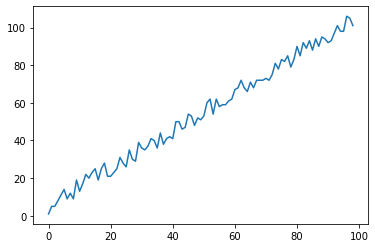

In [10]:
series=pd.Series([i+np.random.randint(10) for i in range(1,100)])
series.plot()

C:\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


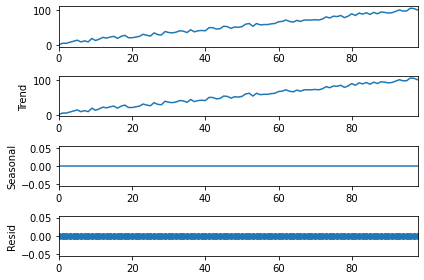

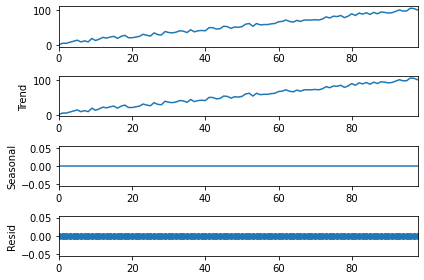

In [16]:
result=seasonal_decompose(series,model="additive",freq=1)
result.plot()
# 결과 확인 : residual, Seaonal 없고 Trend만 확인됨

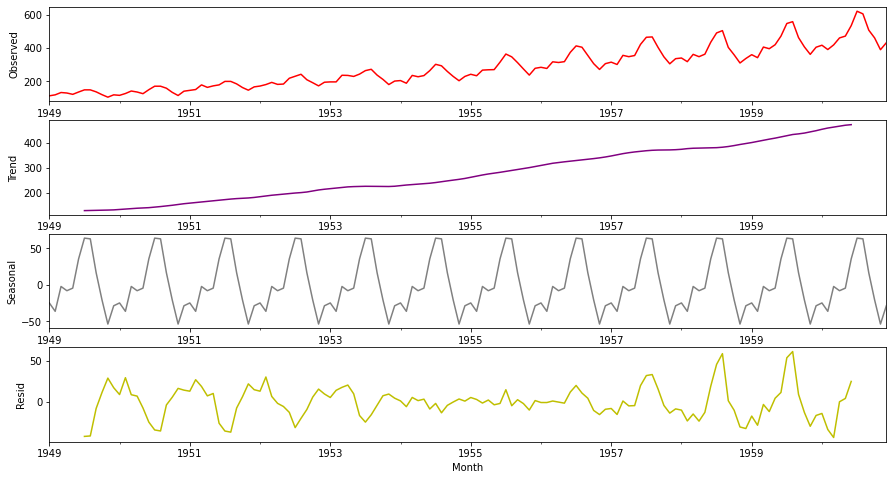

In [44]:
# 비쥬얼 함수 정의해서 위의 결과를 보기 좋게
def plot_decompose(result):
    fig,(ax1,ax2,ax3,ax4)=plt.subplots(4,1,figsize=(15,8)) # subplot 4개를 1개 컬럼으로 정렬
    result.observed.plot(legend=False,ax=ax1,c="r")
    ax1.set_ylabel("Observed")
    result.trend.plot(legend=False,ax=ax2,c="purple")
    ax2.set_ylabel("Trend")
    result.seasonal.plot(legend=False,ax=ax3,c="gray")
    ax3.set_ylabel("Seasonal")
    result.resid.plot(legend=False,ax=ax4,c="y")
    ax4.set_ylabel("Resid")
    
plot_decompose(result)

### Multiplicative Model
Exponential한 모델의 경우 곱으로 표현. 아래 식에 로그 취하면 위의 + 모델과 같음
Y_t = Cyclical* Trend * Seasonality * Noise(=Error)

<AxesSubplot:>

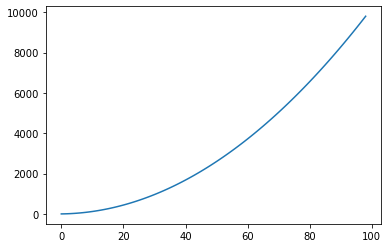

In [45]:
series=pd.Series([i**2 for i in range(1,100)])
series.plot()

C:\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


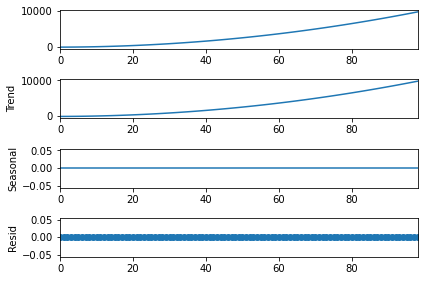

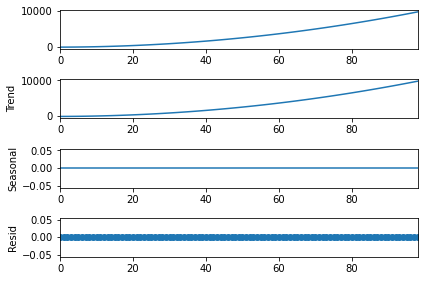

In [46]:
result=seasonal_decompose(series,model="Multiplicative",freq=1)
result.plot()
# 결과 확인 : residual, Seaonal 없고 Trend만 확인됨

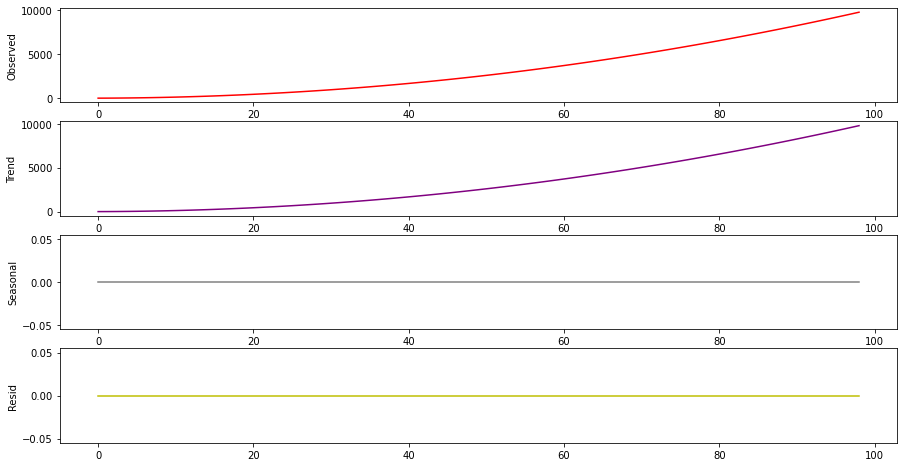

In [47]:
plot_decompose(result)

In [48]:
## 실습
passger=pd.read_csv("data/AirPassengers.csv",index_col="Month")
passger

,#Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
...,...
1960-08,606
1960-09,508
1960-10,461


In [50]:
passger.index=pd.to_datetime(passger.index)
result=seasonal_decompose(passger["#Passengers"],model="Multiplicative")

'\n\n'

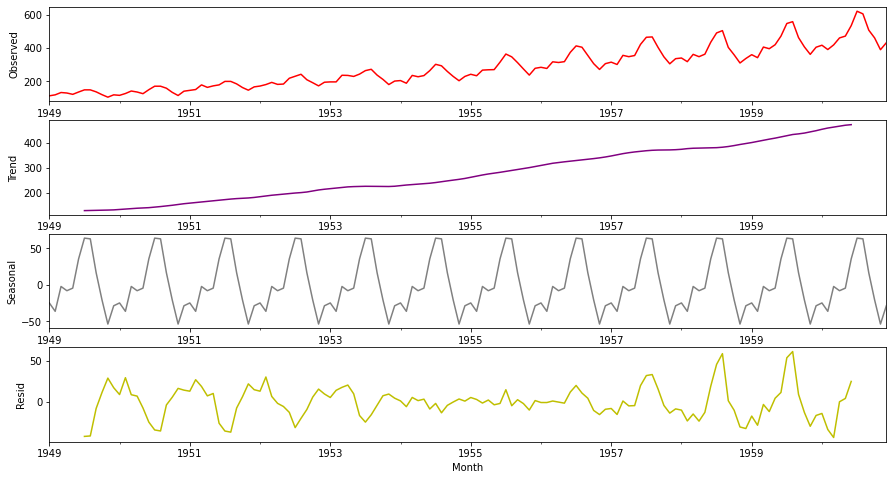

In [51]:
plot_decompose(result)
'''
시계열 데이터를 모델링은 트렌드를 제거하고, seasonality를 뺀 다음 noise에서 패턴을 얻어서 모델링 하고, 
예측은 모델링 된 것에 seasonality와 trend를 더하는 방식으로 진행됨.
'''